In [1]:
#snippet to set notebook to screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

ftp://cddis.gsfc.nasa.gov/gps/products/ionex/2007/157/igsg1570.07i.Z


../RMextract/getIONEX.py:68: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  times=np.zeros(NumberOfMaps,dtype='float32');
../RMextract/getIONEX.py:69: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  tecdata = np.zeros((NumberOfMaps,pointsLat,pointsLon))
../RMextract/getIONEX.py:70: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rmsdata = np.zeros((NumberOfMaps,pointsLat,pointsLon))


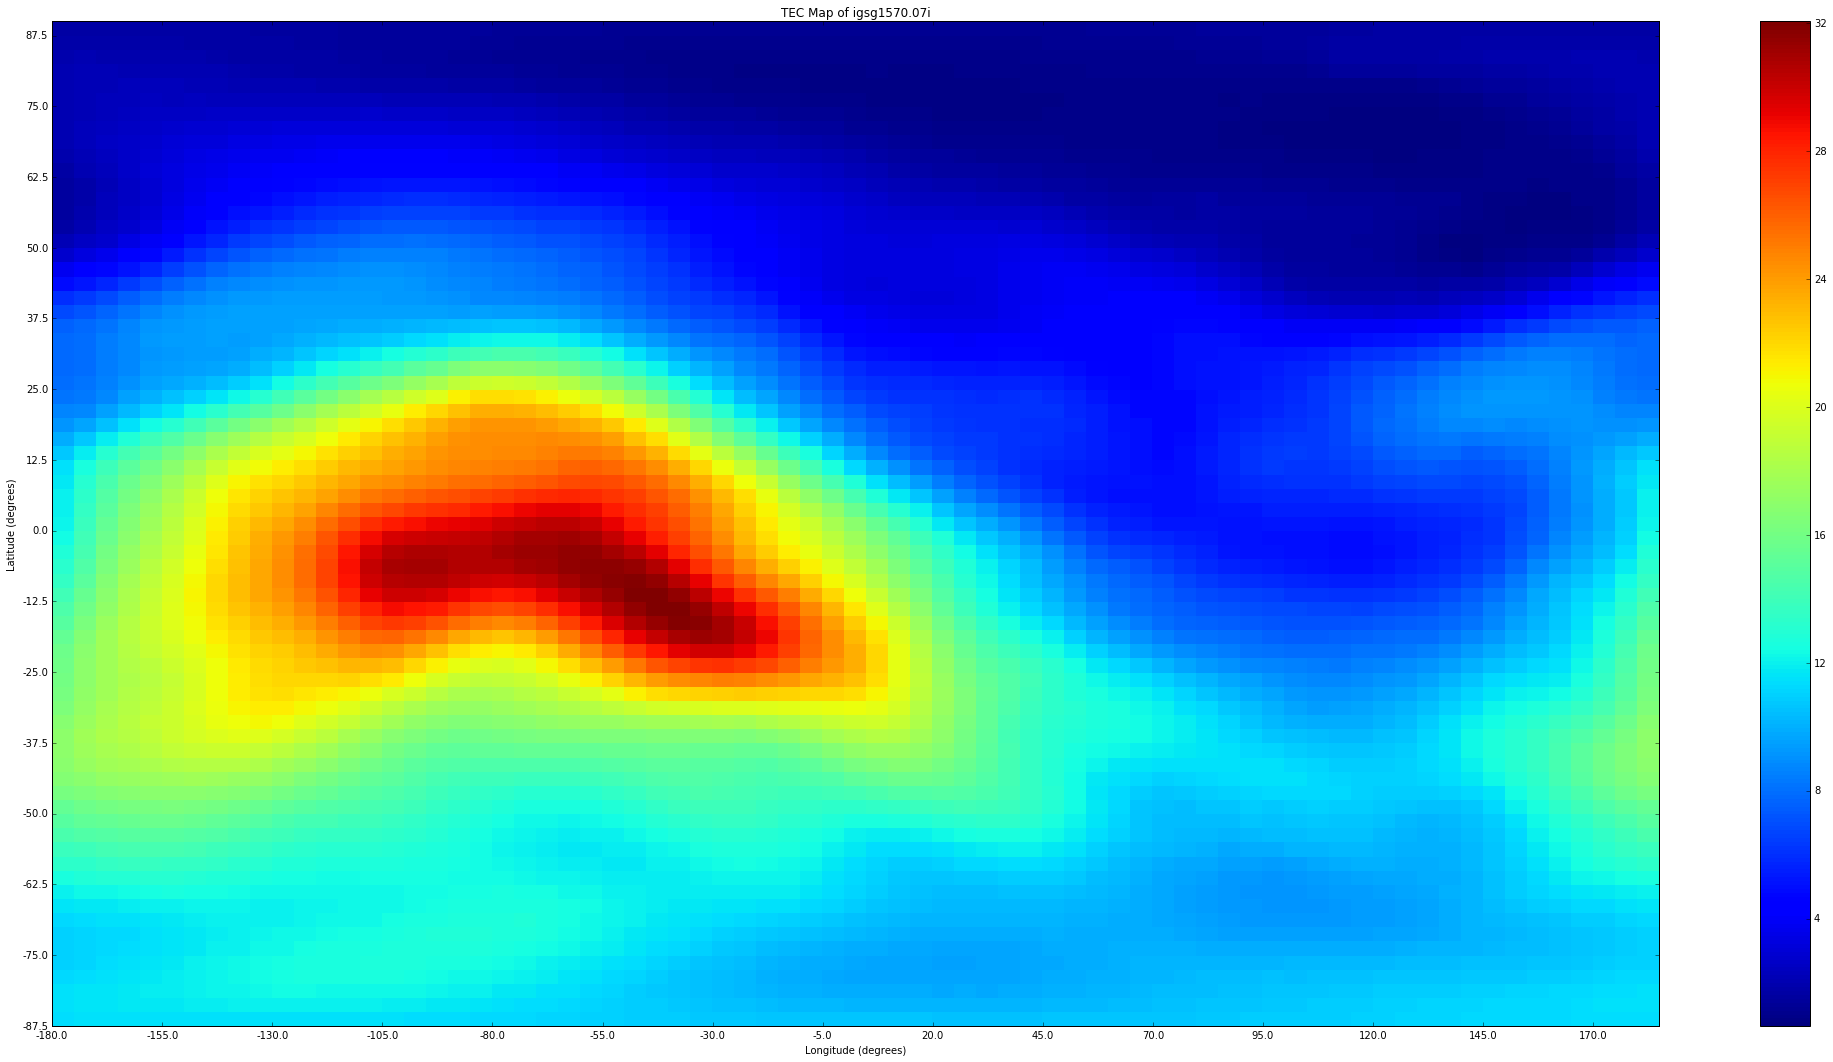

In [2]:
from tec_map_generator import generate_tec_map, get_ionex_file
%matplotlib inline
ionex_file = get_ionex_file(2007, 157)
ionex_file
tecs = generate_tec_map(ionex_file, hour_in_day=19)